# Explore here

In [149]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import pickle
from pickle import  dump

In [150]:
df = pd.read_csv("/workspaces/MLWEB-FLASK/data/raw/CarPricesPrediction.csv")

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Make        1000 non-null   object 
 2   Model       1000 non-null   object 
 3   Year        1000 non-null   int64  
 4   Mileage     1000 non-null   int64  
 5   Condition   1000 non-null   object 
 6   Price       1000 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [152]:
df.head(10)

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85
5,5,Ford,Silverado,2013,23600,Excellent,27820.00
6,6,Toyota,Altima,2014,11470,Excellent,27426.60
7,7,Chevrolet,Silverado,2015,89471,Good,22526.55
8,8,Ford,Camry,2014,121298,Good,21935.10
9,9,Ford,Altima,2016,110691,Excellent,20465.45


In [153]:
df.dropna()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85
...,...,...,...,...,...,...,...
995,995,Nissan,Camry,2010,149032,Excellent,24548.50
996,996,Chevrolet,F-150,2014,20608,Excellent,26969.70
997,997,Ford,Altima,2016,109851,Good,20507.55
998,998,Toyota,Silverado,2010,11704,Good,31414.90


Handle Null values

In [154]:
missing_values = df.isnull().sum()
missing_values

Unnamed: 0    0
Make          0
Model         0
Year          0
Mileage       0
Condition     0
Price         0
dtype: int64

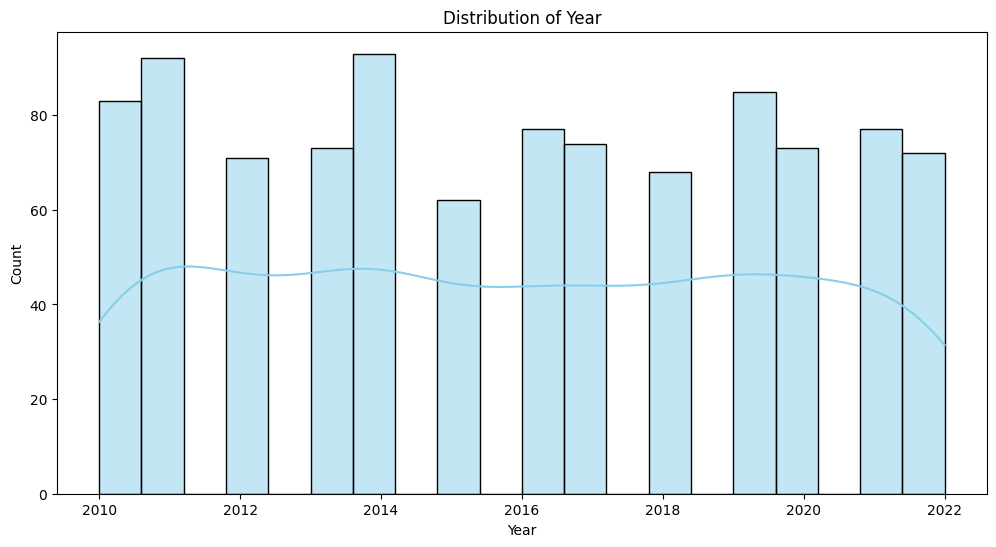

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.histplot(df['Year'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

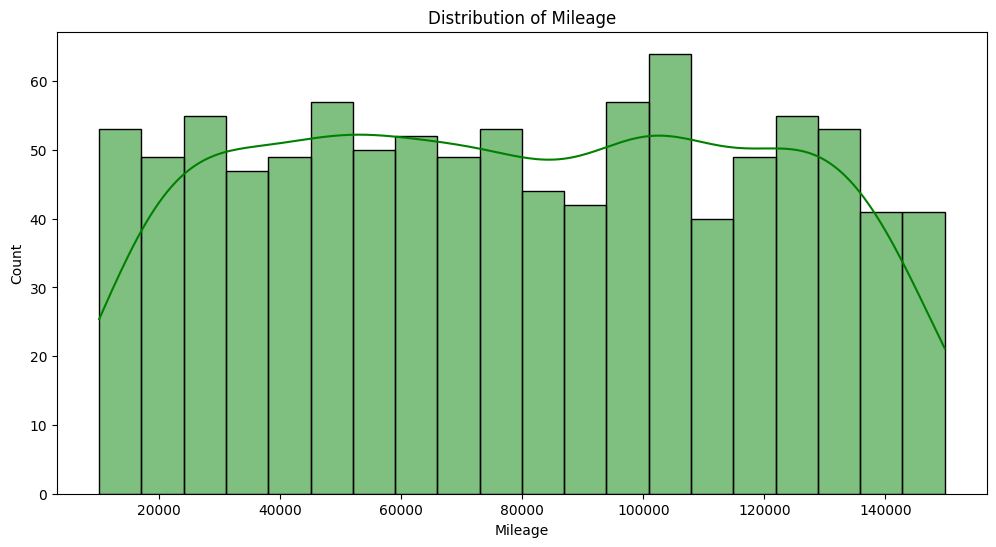

In [156]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Mileage'], bins=20, kde=True, color='green')
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Count')
plt.show()

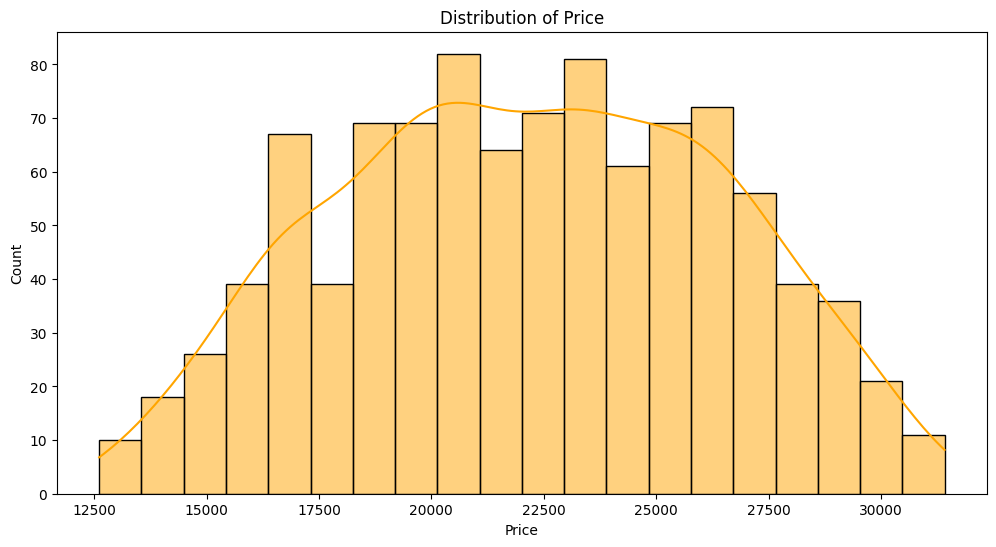

In [157]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=20, kde=True, color='orange')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

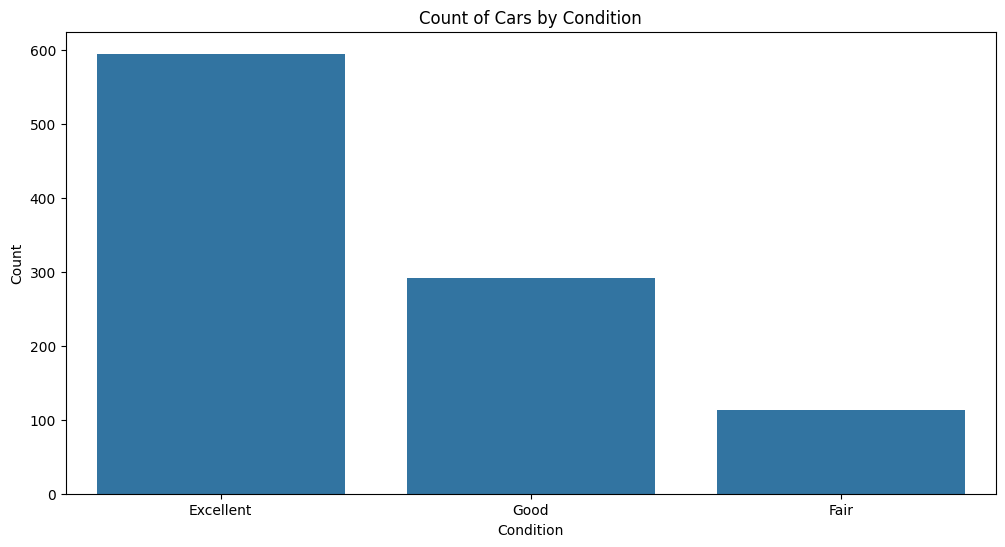

In [158]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Condition')
plt.title('Count of Cars by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

Training Model

In [159]:
import pandas as pd
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset
# df = pd.read_csv('your_data.csv')

# Data Preparation
X = df.drop('Price', axis=1)
y = df['Price']

# Define categorical and numerical features
categorical_features = ['Make', 'Model', 'Condition']
numerical_features = ['Year', 'Mileage']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features)
    ])

# Create full pipeline with estimator
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
full_pipeline.fit(X_train, y_train)

# Save entire pipeline
pickle.dump(full_pipeline, open("../models/full_pipeline.pkl", "wb"))

# Evaluation
train_pred = full_pipeline.predict(X_train)
test_pred = full_pipeline.predict(X_test)

print(f"Train MSE: {mean_squared_error(y_train, train_pred):.2f}")
print(f"Test MSE: {mean_squared_error(y_test, test_pred):.2f}")

Train MSE: 0.00
Test MSE: 0.00


In [165]:
from pickle import  dump
dump(model, open("../models/Price_model_flask.sav", "wb"))